In [1]:
""" This is the main script for eap ml project, which plays with all ml methods, applicable for cpcrsp analysis
Created on Sat Feb 12 15:19:54 2022
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import random
import gc
import dill
import statsmodels.api as sm
from sklearn.svm import SVR
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNetCV
from sklearn import svm
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

plt.style.use('seaborn-white')
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', 40)
gc.enable()

In [2]:
path = '../input/mleap-data/'

s_train_X = pd.read_csv(path + 's_train_X.csv')
s_train_y = pd.read_csv(path + 's_train_y.csv')
s_test_X = pd.read_csv(path + 's_test_X.csv')
s_test_y = pd.read_csv(path + 's_test_y.csv')
sp_train_X = pd.read_csv(path + 'sp_train_X.csv')
lp_train_X = pd.read_csv(path + 'lp_train_X.csv')
sp_test_X = pd.read_csv(path + 'sp_test_X.csv')
lp_test_X = pd.read_csv(path + 'lp_test_X.csv')

s_train_X.drop(columns='Unnamed: 0', inplace=True)
s_train_y.drop(columns='Unnamed: 0', inplace=True)
s_test_X.drop(columns='Unnamed: 0', inplace=True)
sp_train_X.drop(columns='Unnamed: 0', inplace=True)
lp_train_X.drop(columns='Unnamed: 0', inplace=True)
lp_test_X.drop(columns='Unnamed: 0', inplace=True)

s_train_X = np.array(s_train_X)
s_train_y = np.array(s_train_y)
s_test_X = np.array(s_test_X)
s_test_y = np.array(s_test_y)
sp_train_X = np.array(sp_train_X)
lp_train_X = np.array(lp_train_X)
sp_test_X = np.array(sp_test_X)
lp_test_X = np.array(lp_test_X)

print(s_train_X.shape)
print(s_train_y.shape)
print(s_test_X.shape)
print(s_test_y.shape)
print(sp_train_X.shape)
print(lp_train_X.shape)
print(sp_test_X.shape)
print(lp_test_X.shape)

(1257579, 27)
(1257579, 1)
(100000, 27)
(100000, 1)
(1257579, 10)
(1257579, 50)
(100000, 10)
(100000, 50)


In [3]:
model_ann5_s = Sequential([
    BatchNormalization(input_shape=(27,)),
    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dropout(0.4),
    Dense(1)])

model_ann5_sp = Sequential([
    BatchNormalization(input_shape=(10,)),
    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dropout(0.4),
    Dense(1)])

model_ann5_lp = Sequential([
    BatchNormalization(input_shape=(50,)),
    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dropout(0.4),
    Dense(1)])


print(model_ann5_s.count_params())
print(model_ann5_sp.count_params())
print(model_ann5_lp.count_params())
# here is cutoff. going wider/deeper does not seem to help...
# run this model with 50-100 epochs for all subsamples

2022-02-16 21:31:03.712858: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 21:31:03.878705: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 21:31:03.879623: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 21:31:03.881890: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

159693
155273
165673


2022-02-16 21:31:18.307186: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/80
2457/2457 - 30s - loss: 1.0387 - mean_squared_error: 1.0387 - val_loss: 1.1404 - val_mean_squared_error: 1.1404
Epoch 2/80
2457/2457 - 26s - loss: 0.9998 - mean_squared_error: 0.9998 - val_loss: 1.1383 - val_mean_squared_error: 1.1383
Epoch 3/80
2457/2457 - 27s - loss: 0.9977 - mean_squared_error: 0.9977 - val_loss: 1.1345 - val_mean_squared_error: 1.1345
Epoch 4/80
2457/2457 - 21s - loss: 0.9957 - mean_squared_error: 0.9957 - val_loss: 1.1314 - val_mean_squared_error: 1.1314
Epoch 5/80
2457/2457 - 13s - loss: 0.9946 - mean_squared_error: 0.9946 - val_loss: 1.1297 - val_mean_squared_error: 1.1297
Epoch 6/80
2457/2457 - 12s - loss: 0.9933 - mean_squared_error: 0.9933 - val_loss: 1.1281 - val_mean_squared_error: 1.1281
Epoch 7/80
2457/2457 - 14s - loss: 0.9926 - mean_squared_error: 0.9926 - val_loss: 1.1295 - val_mean_squared_error: 1.1295
Epoch 8/80
2457/2457 - 12s - loss: 0.9920 - mean_squared_error: 0.9920 - val_loss: 1.1277 - val_mean_squared_error: 1.1277
Epoch 9/80
2457/

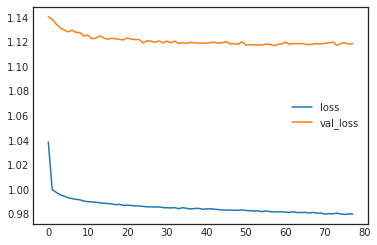

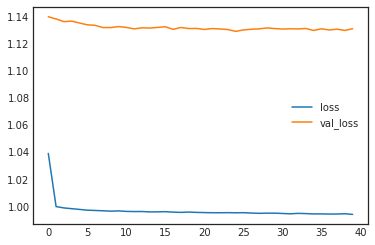

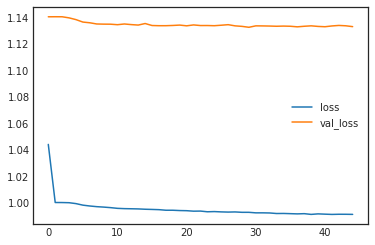

In [4]:
early_stopping20 = EarlyStopping(patience=20)
early_stopping15 = EarlyStopping(patience=15)

model_ann5_s.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model_ann5_s.fit(s_train_X, s_train_y, validation_data=(s_test_X, s_test_y), 
                         batch_size=512, epochs=80, verbose=2, callbacks=[early_stopping20])
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

ann_s = [r2_score(s_train_y, model_ann5_s.predict(s_train_X)), 
       r2_score(s_test_y, model_ann5_s.predict(s_test_X))]

model_ann5_sp.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model_ann5_sp.fit(sp_train_X, s_train_y, validation_data=(sp_test_X, s_test_y), 
                         batch_size=512, epochs=80, verbose=2, callbacks=[early_stopping15])
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

ann_sp = [r2_score(s_train_y, model_ann5_sp.predict(sp_train_X)), 
       r2_score(s_test_y, model_ann5_sp.predict(sp_test_X))]

model_ann5_lp.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model_ann5_lp.fit(lp_train_X, s_train_y, validation_data=(lp_test_X, s_test_y), 
                         batch_size=512, epochs=80, verbose=2, callbacks=[early_stopping15])
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

ann_lp = [r2_score(s_train_y, model_ann5_lp.predict(lp_train_X)), 
       r2_score(s_test_y, model_ann5_lp.predict(lp_test_X))]

In [5]:
ann_results = ann_s + ann_sp + ann_lp

ann_results

[0.029290292478300284,
 0.019104439727550826,
 0.008316522880432498,
 0.007993585967341121,
 0.01186334796973576,
 0.00649954350009363]

In [6]:
import pickle

with open("ann_results_2", "wb") as fp:   #Pickling
    pickle.dump(ann_results, fp)

In [9]:
temp = pd.DataFrame(ann_results)
temp.to_csv('ann_results_2.csv')

In [10]:
# import the modules we'll need
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [11]:
create_download_link(temp)
